## 문제 : k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 최적의 이웃 수를 산출하라. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

In [19]:
data = pd.read_csv("./csvfiles/유방암.csv")
print("결측치 개수 :",data.isnull().sum().sum())

결측치 개수 : 0


In [6]:
data.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
np.random.seed(seed = 1234)
msk = np.random.rand(data.shape[0]) < 0.7
data_train = data[msk]
data_test = data[~msk]

In [14]:
train_y = data_train["diagnosis"]
train_x = data_train.drop("diagnosis", axis = 1)
test_y = data_test["diagnosis"]
test_x = data_test.drop("diagnosis", axis = 1)

print("train data X size:", train_x.shape)
print("train data y size:", train_y.shape)
print("test data X size:", test_x.shape)
print("test data y size:", test_y.shape)

train data X size: (385, 30)
train data y size: (385,)
test data X size: (184, 30)
test data y size: (184,)


In [15]:
knn_uncustomized = KNeighborsClassifier()

In [16]:
knn_uncustomized.fit(train_x,train_y)

y_pred = knn_uncustomized.predict(test_x)
print("predict test set: {}".format(y_pred.tolist()[:10]))
print("test set label: {}".format(test_y.tolist()[:10]))
print("Accuracy on test set : {:.3f}".format(knn_uncustomized.score(test_x,test_y)))

predict test set: [1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
test set label: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Accuracy on test set : 0.946


##### ->최적 이웃 찾기 전 default 이웃의 정확도 0.946

#  최적 이웃 확인 위해 모델 돌리기

In [73]:
max_n_neighbors = 31
para_n_neighbors = [i+1 for i in range(2, max_n_neighbors)]
#train 및 test정확도 결과 저장용
train_accuracy = []
test_accuracy = []
for i in para_n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x, train_y)
    train_accuracy.append(clf.score(train_x, train_y))
    test_accuracy.append(clf.score(test_x,test_y))
    
#저장된 모델의 criterion 및 train/test 데이터 분류 정확도 테이블 생성

ds_neighbors = pd.DataFrame()
ds_neighbors["Neighbors"] = para_n_neighbors
# ds_neighbors["TrainAccuracy"] = train_accuracy
ds_neighbors["TestAccuracy"] = test_accuracy
ds_neighbors.round(3).head(7)


,Neighbors,TestAccuracy
0,3,0.940
1,4,0.924
2,5,0.946
3,6,0.957
4,7,0.946
5,8,0.946
6,9,0.935


Text(7, 0.9575217391304348, 'local max')

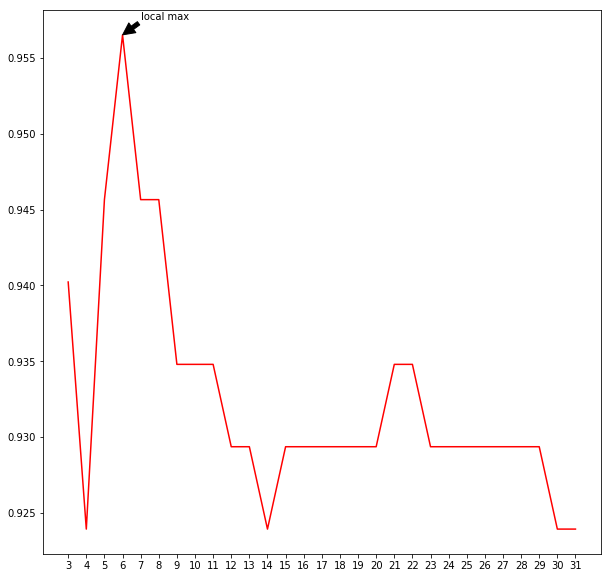

In [72]:
plt.figure(figsize=(10,10))
plt.plot(ds_neighbors.set_index("Neighbors"), color='r')
plt.xticks(np.array(ds_neighbors['Neighbors']));
ymax = max(ds_neighbors['TestAccuracy'])
plt.annotate('local max', xy=(6, ymax), xytext=(7, ymax+0.001),
            arrowprops=dict(facecolor='black', shrink=0.005),
            )

해당 데이터의 최적 KNN 이웃 수를 구하기 위해 3부터 30까지 찾아본 결과,    
위 그래프와 같이 최적의 이웃은 6으로 나타났다.
* neighbor : 6 -> 95.7%